In [1]:
%mkdir dataset

In [2]:
!cp /content/drive/MyDrive/data/my_data.zip /content/

In [3]:
!unzip ./my_data.zip -d dataset/

Archive:  ./my_data.zip
   creating: dataset/my_data/
   creating: dataset/my_data/train/
   creating: dataset/my_data/train/images/
  inflating: dataset/my_data/train/images/1121_154.jpg  
  inflating: dataset/my_data/train/images/1121_31.jpg  
  inflating: dataset/my_data/train/images/1121_214.jpg  
  inflating: dataset/my_data/train/images/1121_287.jpg  
  inflating: dataset/my_data/train/images/1121_119.jpg  
  inflating: dataset/my_data/train/images/1121_347.jpg  
  inflating: dataset/my_data/train/images/1121_385.jpg  
  inflating: dataset/my_data/train/images/1121_366.jpg  
  inflating: dataset/my_data/train/images/1125_10.jpg  
  inflating: dataset/my_data/train/images/1121_429.jpg  
  inflating: dataset/my_data/train/images/1121_176.jpg  
  inflating: dataset/my_data/train/images/1125_34.jpg  
  inflating: dataset/my_data/train/images/1121_30.jpg  
  inflating: dataset/my_data/train/images/1121_68.jpg  
  inflating: dataset/my_data/train/images/1121_208.jpg  
  inflating: data

In [4]:
import glob
import cv2
import random
from google.colab.patches import cv2_imshow

In [5]:
image_paths = glob.glob("/content/dataset/my_data/train/images/*.jpg")
len(image_paths)

381

(480, 640, 3)


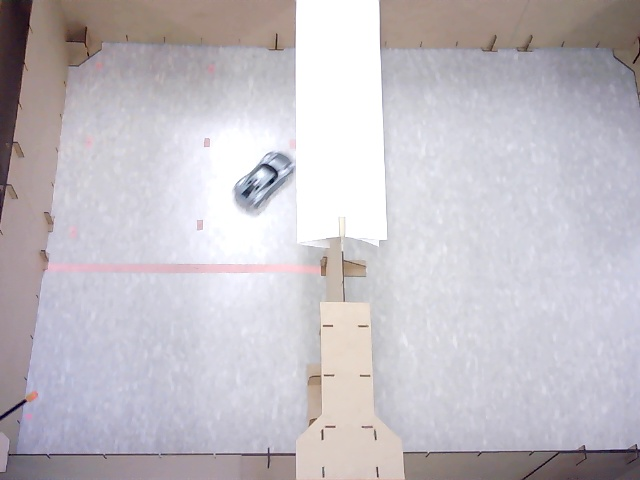

In [6]:
img = random.choice(image_paths)

img = cv2.imread(img)
print(img.shape)
cv2_imshow(img)

In [7]:
import yaml

data = {
    'train' : '/content/dataset/my_data/train/images',
    'test' : '/content/dataset/my_data/test/images',
    'val' : '/content/dataset/my_data/valid/images',

    'nc': 1,
    'names':['car']
}

with open('/content/dataset/custom_data.yaml', 'w') as f:
  yaml.dump(data,f)

In [8]:
with open('/content/dataset/custom_data.yaml','r') as f:
  y = yaml.safe_load(f)
  display(y)

{'names': ['car'],
 'nc': 1,
 'test': '/content/dataset/my_data/test/images',
 'train': '/content/dataset/my_data/train/images',
 'val': '/content/dataset/my_data/valid/images'}

In [9]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 46.9 MB/s eta 0:00:00


In [10]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 266MB/s]


In [11]:
model.train(data='/content/dataset/custom_data.yaml', epochs=200, patience=20, batch=32, imgsz=640)

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/custom_data.yaml, epochs=200, time=None, patience=20, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 253MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/my_data/train/labels... 381 images, 0 backgrounds, 0 corrupt: 100%|██████████| 381/381 [00:00<00:00, 1703.96it/s]

train: New cache created: /content/dataset/my_data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/my_data/valid/labels... 109 images, 0 backgrounds, 0 corrupt: 100%|██████████| 109/109 [00:00<00:00, 1244.93it/s]

val: New cache created: /content/dataset/my_data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.47G      1.202      3.681      1.048         56        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        109        109    0.00327      0.982      0.828       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.94G      1.065      1.909     0.9682         49        640: 100%|██████████| 12/12 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        109        109    0.00324      0.972    0.00403     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      3.94G      1.002      1.501     0.9608         46        640: 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        109        109    0.00324      0.972     0.0289     0.0243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.94G       1.01      1.388     0.9873         59        640: 100%|██████████| 12/12 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all        109        109    0.00321      0.963      0.272      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.94G      1.043      1.295     0.9855         45        640: 100%|██████████| 12/12 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        109        109          1      0.348      0.722      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.94G      1.008      1.221     0.9699         51        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        109        109      0.989      0.578      0.952       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      3.94G      1.002      1.154     0.9735         49        640: 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        109        109      0.898      0.156       0.67      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      3.94G      1.045      1.078      0.991         56        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        109        109      0.843      0.739      0.803      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.94G      1.055      1.032       0.99         45        640: 100%|██████████| 12/12 [00:04<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        109        109      0.924      0.893      0.976        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.94G     0.9844      0.956     0.9683         52        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all        109        109      0.908       0.91      0.958      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      3.94G     0.9871     0.8337     0.9694         52        640: 100%|██████████| 12/12 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        109        109      0.937      0.917      0.948      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      3.94G     0.9811     0.8308     0.9797         46        640: 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all        109        109      0.894      0.899      0.936      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      3.94G     0.9292     0.7754     0.9633         54        640: 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all        109        109      0.939      0.846      0.928      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      3.94G     0.9221     0.7341     0.9665         47        640: 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        109        109      0.958       0.89      0.974      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.94G     0.9631     0.7318     0.9763         50        640: 100%|██████████| 12/12 [00:04<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all        109        109      0.884      0.917      0.966      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      3.94G     0.9613     0.7059     0.9596         66        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all        109        109      0.896      0.953      0.962      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      3.94G     0.9294     0.6934     0.9561         49        640: 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all        109        109      0.934      0.927      0.969      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      3.94G     0.9037     0.6446     0.9531         50        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all        109        109      0.958      0.963      0.985      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      3.94G     0.8594     0.6171     0.9354         47        640: 100%|██████████| 12/12 [00:04<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all        109        109      0.907      0.892      0.939      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      3.94G     0.9121     0.6317     0.9599         55        640: 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        109        109      0.971      0.935      0.986        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      3.94G     0.8909     0.6043     0.9456         40        640: 100%|██████████| 12/12 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all        109        109      0.869      0.851      0.852      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      3.94G     0.8919     0.6033     0.9433         44        640: 100%|██████████| 12/12 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        109        109      0.927       0.89      0.942      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      3.94G     0.9111     0.6002     0.9438         43        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        109        109      0.897      0.917      0.929      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      3.94G     0.8838     0.5791     0.9391         43        640: 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        109        109      0.971      0.917      0.981      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      3.94G     0.8778     0.5666     0.9292         52        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all        109        109      0.954      0.991      0.986      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      3.94G     0.8558     0.5449     0.9246         48        640: 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all        109        109      0.933      0.927      0.967      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      3.94G     0.8528     0.5518     0.9319         43        640: 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all        109        109      0.972      0.963       0.99      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.94G     0.8155     0.5342     0.9363         42        640: 100%|██████████| 12/12 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all        109        109      0.896      0.826      0.894      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      3.94G      0.846     0.5324     0.9221         44        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        109        109      0.969      0.761      0.883       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      3.94G     0.8234     0.5276     0.9274         45        640: 100%|██████████| 12/12 [00:04<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all        109        109       0.92      0.846      0.913      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      3.94G      0.835     0.5246     0.9426         55        640: 100%|██████████| 12/12 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        109        109      0.856      0.862      0.891      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      3.94G     0.8642     0.5337     0.9259         51        640: 100%|██████████| 12/12 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all        109        109      0.304      0.393       0.31      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      3.94G     0.8561     0.5308      0.933         51        640: 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        109        109      0.903       0.77      0.863      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      3.94G     0.8258     0.5226     0.9384         51        640: 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all        109        109      0.946      0.962       0.98      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      3.94G     0.8308     0.5367     0.9309         40        640: 100%|██████████| 12/12 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        109        109      0.912      0.948      0.978      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      3.94G     0.8338     0.5254     0.9284         39        640: 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all        109        109      0.982      0.978      0.994      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      3.94G     0.8455     0.5449     0.9429         44        640: 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        109        109      0.954      0.954      0.987      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      3.94G     0.8107     0.5211     0.9273         43        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all        109        109      0.976      0.972      0.993      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      3.94G     0.8428     0.5142     0.9275         48        640: 100%|██████████| 12/12 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all        109        109      0.991      0.972      0.994      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      3.94G     0.8106     0.5001     0.9183         48        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all        109        109      0.984      0.982      0.994      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      3.94G     0.8052      0.493     0.9117         46        640: 100%|██████████| 12/12 [00:04<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all        109        109      0.989      0.991      0.994      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      3.94G     0.7898     0.4831     0.9043         51        640: 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all        109        109      0.973      0.954      0.984      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      3.94G     0.7849     0.4865     0.9061         47        640: 100%|██████████| 12/12 [00:04<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        109        109      0.954      0.944      0.971      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      3.94G      0.817      0.498      0.932         53        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        109        109          1      0.991      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      3.94G      0.805     0.4924     0.9159         40        640: 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all        109        109      0.955      0.973      0.992      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      3.94G     0.7828     0.4766     0.8897         55        640: 100%|██████████| 12/12 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        109        109      0.982      0.982      0.994      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      3.94G     0.8123     0.4934     0.9157         45        640: 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        109        109      0.981      0.968      0.994       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      3.94G     0.8175     0.4873     0.9271         44        640: 100%|██████████| 12/12 [00:04<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        109        109      0.992      0.982      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      3.94G     0.8226     0.4941     0.9267         45        640: 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all        109        109      0.928      0.949      0.973      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      3.94G     0.7707     0.4729     0.9075         46        640: 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all        109        109      0.934      0.954      0.986      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      3.94G     0.7753     0.4802     0.9167         49        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all        109        109      0.969      0.991      0.993      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      3.94G     0.7636     0.4676     0.9041         50        640: 100%|██████████| 12/12 [00:04<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all        109        109       0.97      0.982      0.991      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      3.94G     0.7847     0.4717     0.9101         40        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        109        109      0.931      0.983       0.99      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      3.94G     0.7341     0.4527     0.9042         48        640: 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all        109        109      0.972      0.963      0.984      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      3.94G     0.7543       0.45     0.8959         46        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        109        109      0.982      0.974      0.994      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      3.94G     0.8011     0.4731     0.9172         43        640: 100%|██████████| 12/12 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all        109        109      0.986      0.972      0.994      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      3.94G     0.7497     0.4527     0.9011         49        640: 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        109        109      0.962      0.936       0.97      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      3.94G     0.7847     0.4757     0.9195         42        640: 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all        109        109      0.968      0.982      0.991      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      3.94G     0.7861     0.4685     0.9074         57        640: 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        109        109      0.981          1      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      3.94G     0.7668     0.4688     0.9083         42        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all        109        109      0.989      0.991      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      3.94G     0.7516     0.4637     0.8997         49        640: 100%|██████████| 12/12 [00:04<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        109        109      0.991      0.991      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      3.94G     0.7516     0.4507     0.9032         40        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        109        109      0.955          1      0.993      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      3.94G     0.7265     0.4349     0.8976         43        640: 100%|██████████| 12/12 [00:04<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all        109        109      0.955       0.98      0.989      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      3.94G      0.747     0.4337     0.8957         47        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all        109        109       0.97      0.991      0.993      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      3.94G     0.7358     0.4493     0.8965         52        640: 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all        109        109      0.954          1      0.991      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      3.94G     0.7284     0.4348     0.8932         48        640: 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        109        109      0.915      0.989      0.989      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      3.94G     0.7267     0.4347     0.8948         44        640: 100%|██████████| 12/12 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all        109        109      0.982       0.99      0.994      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      3.94G     0.7177     0.4308     0.8914         41        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        109        109       0.97      0.991      0.992      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      3.94G     0.7347     0.4372     0.8893         42        640: 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all        109        109      0.955      0.978       0.99       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      3.94G     0.7428     0.4367     0.9017         51        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        109        109      0.982      0.991      0.993      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      3.94G     0.7117     0.4312     0.8956         52        640: 100%|██████████| 12/12 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        109        109       0.98      0.982      0.993      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      3.94G     0.7565     0.4518     0.9083         43        640: 100%|██████████| 12/12 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        109        109       0.97      0.982      0.993      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      3.94G     0.7261     0.4298     0.9023         55        640: 100%|██████████| 12/12 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        109        109      0.986      0.963      0.991      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      3.94G     0.7015     0.4088     0.8905         46        640: 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        109        109      0.962      0.928      0.972      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      3.94G     0.7117     0.4113     0.8903         52        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all        109        109      0.952      0.945      0.979       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      3.94G     0.6975     0.4191     0.8814         50        640: 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all        109        109       0.99      0.982      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      3.94G       0.72     0.4271     0.8887         36        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all        109        109      0.991       0.98      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      3.94G     0.6745     0.4104     0.8807         53        640: 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all        109        109      0.991      0.967      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      3.94G     0.7452     0.4266     0.9053         42        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all        109        109       0.98      0.991      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      3.94G      0.713     0.4231      0.894         41        640: 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all        109        109      0.973      0.991      0.994      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      3.94G       0.71     0.4233     0.9001         53        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all        109        109      0.973      0.981      0.991        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      3.94G     0.7048     0.4217     0.8872         47        640: 100%|██████████| 12/12 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all        109        109      0.972       0.97       0.99      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      3.94G     0.7454     0.4221     0.8932         59        640: 100%|██████████| 12/12 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        109        109      0.989          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      3.94G     0.6939     0.4128      0.882         54        640: 100%|██████████| 12/12 [00:05<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all        109        109      0.987      0.982      0.994      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      3.94G     0.7109     0.4139     0.8857         54        640: 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        109        109      0.987      0.991      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      3.94G     0.6996     0.4151     0.8936         53        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all        109        109          1      0.981      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      3.94G     0.7107     0.4234     0.8887         56        640: 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        109        109      0.988      0.982      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      3.94G     0.7056     0.4029     0.8885         54        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all        109        109          1       0.99      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      3.94G      0.685     0.4122     0.8907         34        640: 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all        109        109      0.973          1      0.993      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      3.94G     0.6798     0.4022     0.8813         49        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all        109        109      0.973      0.981      0.993      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      3.94G     0.7208     0.4197     0.8936         41        640: 100%|██████████| 12/12 [00:04<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        109        109      0.964      0.981      0.992      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      3.94G     0.7507     0.4225     0.8999         53        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        109        109      0.964      0.991      0.993      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      3.94G     0.7111     0.4017     0.8913         43        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all        109        109      0.965      0.998      0.994      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      3.94G     0.6776     0.3968     0.8886         54        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all        109        109      0.982      0.996      0.994      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      3.94G     0.6554     0.3936     0.8703         53        640: 100%|██████████| 12/12 [00:04<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all        109        109      0.973      0.996      0.993       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      3.94G     0.6801     0.4012     0.8949         45        640: 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        109        109      0.977      0.982      0.994      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      3.94G     0.6856     0.4053     0.8887         54        640: 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all        109        109      0.976      0.982      0.993      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      3.94G     0.6732     0.3841     0.8813         47        640: 100%|██████████| 12/12 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        109        109      0.982      0.988      0.993      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      3.94G     0.6617     0.4008     0.8677         45        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all        109        109      0.963      0.982      0.994       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      3.94G     0.6452     0.3842     0.8678         50        640: 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        109        109      0.993      0.982      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      3.94G     0.6643     0.3899     0.8858         51        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all        109        109      0.965      0.998      0.993      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      3.94G     0.6438     0.3841     0.8657         60        640: 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all        109        109      0.972      0.991      0.993      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      3.94G     0.6898     0.4117     0.8993         55        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        109        109      0.991      0.999      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      3.94G     0.6503     0.3897     0.8879         46        640: 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all        109        109      0.981      0.991      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      3.94G     0.6502     0.3771     0.8724         51        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all        109        109      0.982      0.991      0.994      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      3.94G     0.6249     0.3739     0.8646         51        640: 100%|██████████| 12/12 [00:04<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        109        109      0.981      0.991      0.994      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      3.94G     0.6838     0.3963     0.8962         49        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        109        109      0.981      0.982      0.993      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      3.94G     0.6745     0.3895     0.8778         52        640: 100%|██████████| 12/12 [00:04<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all        109        109      0.973      0.989      0.994      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      3.94G      0.638     0.3741     0.8594         58        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        109        109      0.998      0.991      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      3.94G     0.6883     0.4005     0.8771         44        640: 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all        109        109      0.963      0.982      0.993      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      3.94G     0.6358     0.3724     0.8611         42        640: 100%|██████████| 12/12 [00:04<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        109        109      0.964      0.982      0.992      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      3.94G     0.6279     0.3739     0.8762         48        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        109        109      0.972      0.982      0.993      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      3.94G     0.6431     0.3826     0.8654         55        640: 100%|██████████| 12/12 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all        109        109      0.973       0.99      0.993      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      3.94G     0.6529     0.3821     0.8819         41        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all        109        109       0.99      0.982      0.994      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      3.94G     0.6261      0.371     0.8678         52        640: 100%|██████████| 12/12 [00:04<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        109        109          1       0.99      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      3.94G     0.6413     0.3724     0.8618         53        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all        109        109       0.99      0.982      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      3.94G      0.655     0.3871     0.8833         46        640: 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all        109        109      0.989      0.982      0.994      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      3.94G     0.6357     0.3751     0.8816         54        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all        109        109          1       0.99      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      3.94G     0.6027     0.3569     0.8608         49        640: 100%|██████████| 12/12 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all        109        109       0.99      0.982      0.994      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      3.94G     0.6357     0.3681     0.8729         67        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        109        109       0.99          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      3.94G     0.6169     0.3627     0.8695         44        640: 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all        109        109       0.99      0.991      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      3.94G     0.6308     0.3776     0.8715         41        640: 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        109        109      0.981      0.982      0.994      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      3.94G     0.6356      0.364     0.8776         42        640: 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all        109        109       0.97      0.982      0.992      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      3.94G     0.6153     0.3588     0.8614         53        640: 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        109        109      0.964      0.972       0.99      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      3.94G     0.6419     0.3837     0.8714         58        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all        109        109      0.977      0.972      0.992      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      3.94G     0.6114     0.3597     0.8621         42        640: 100%|██████████| 12/12 [00:04<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all        109        109      0.989      0.991      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      3.94G     0.6149     0.3637     0.8586         47        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all        109        109      0.982      0.991      0.994      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      3.94G     0.6019     0.3662     0.8604         56        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all        109        109      0.991       0.99      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      3.94G     0.6079     0.3555     0.8577         49        640: 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        109        109       0.99      0.982      0.994      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      3.94G     0.6021     0.3601     0.8633         51        640: 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all        109        109      0.982      0.991      0.994      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      3.94G     0.6112     0.3575     0.8535         57        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        109        109      0.973      0.989      0.994      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      3.94G     0.6318     0.3693     0.8743         47        640: 100%|██████████| 12/12 [00:04<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        109        109      0.991      0.981      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      3.94G     0.6007     0.3587     0.8707         54        640: 100%|██████████| 12/12 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        109        109      0.991      0.979      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      3.94G     0.6228     0.3636     0.8698         44        640: 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all        109        109      0.999      0.991      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      3.94G     0.5972     0.3509     0.8733         41        640: 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        109        109      0.999      0.991      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      3.94G     0.5933      0.352     0.8565         42        640: 100%|██████████| 12/12 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all        109        109      0.991      0.978      0.994      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      3.94G     0.5896     0.3446     0.8589         47        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all        109        109       0.99      0.982      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      3.94G     0.5845     0.3441     0.8677         47        640: 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all        109        109      0.999      0.991      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      3.94G     0.6133     0.3622     0.8735         49        640: 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all        109        109      0.989      0.991      0.994      0.831
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 119, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



139 epochs completed in 0.332 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


                   all        109        109       0.99      0.982      0.994      0.849
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79633a1acb20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

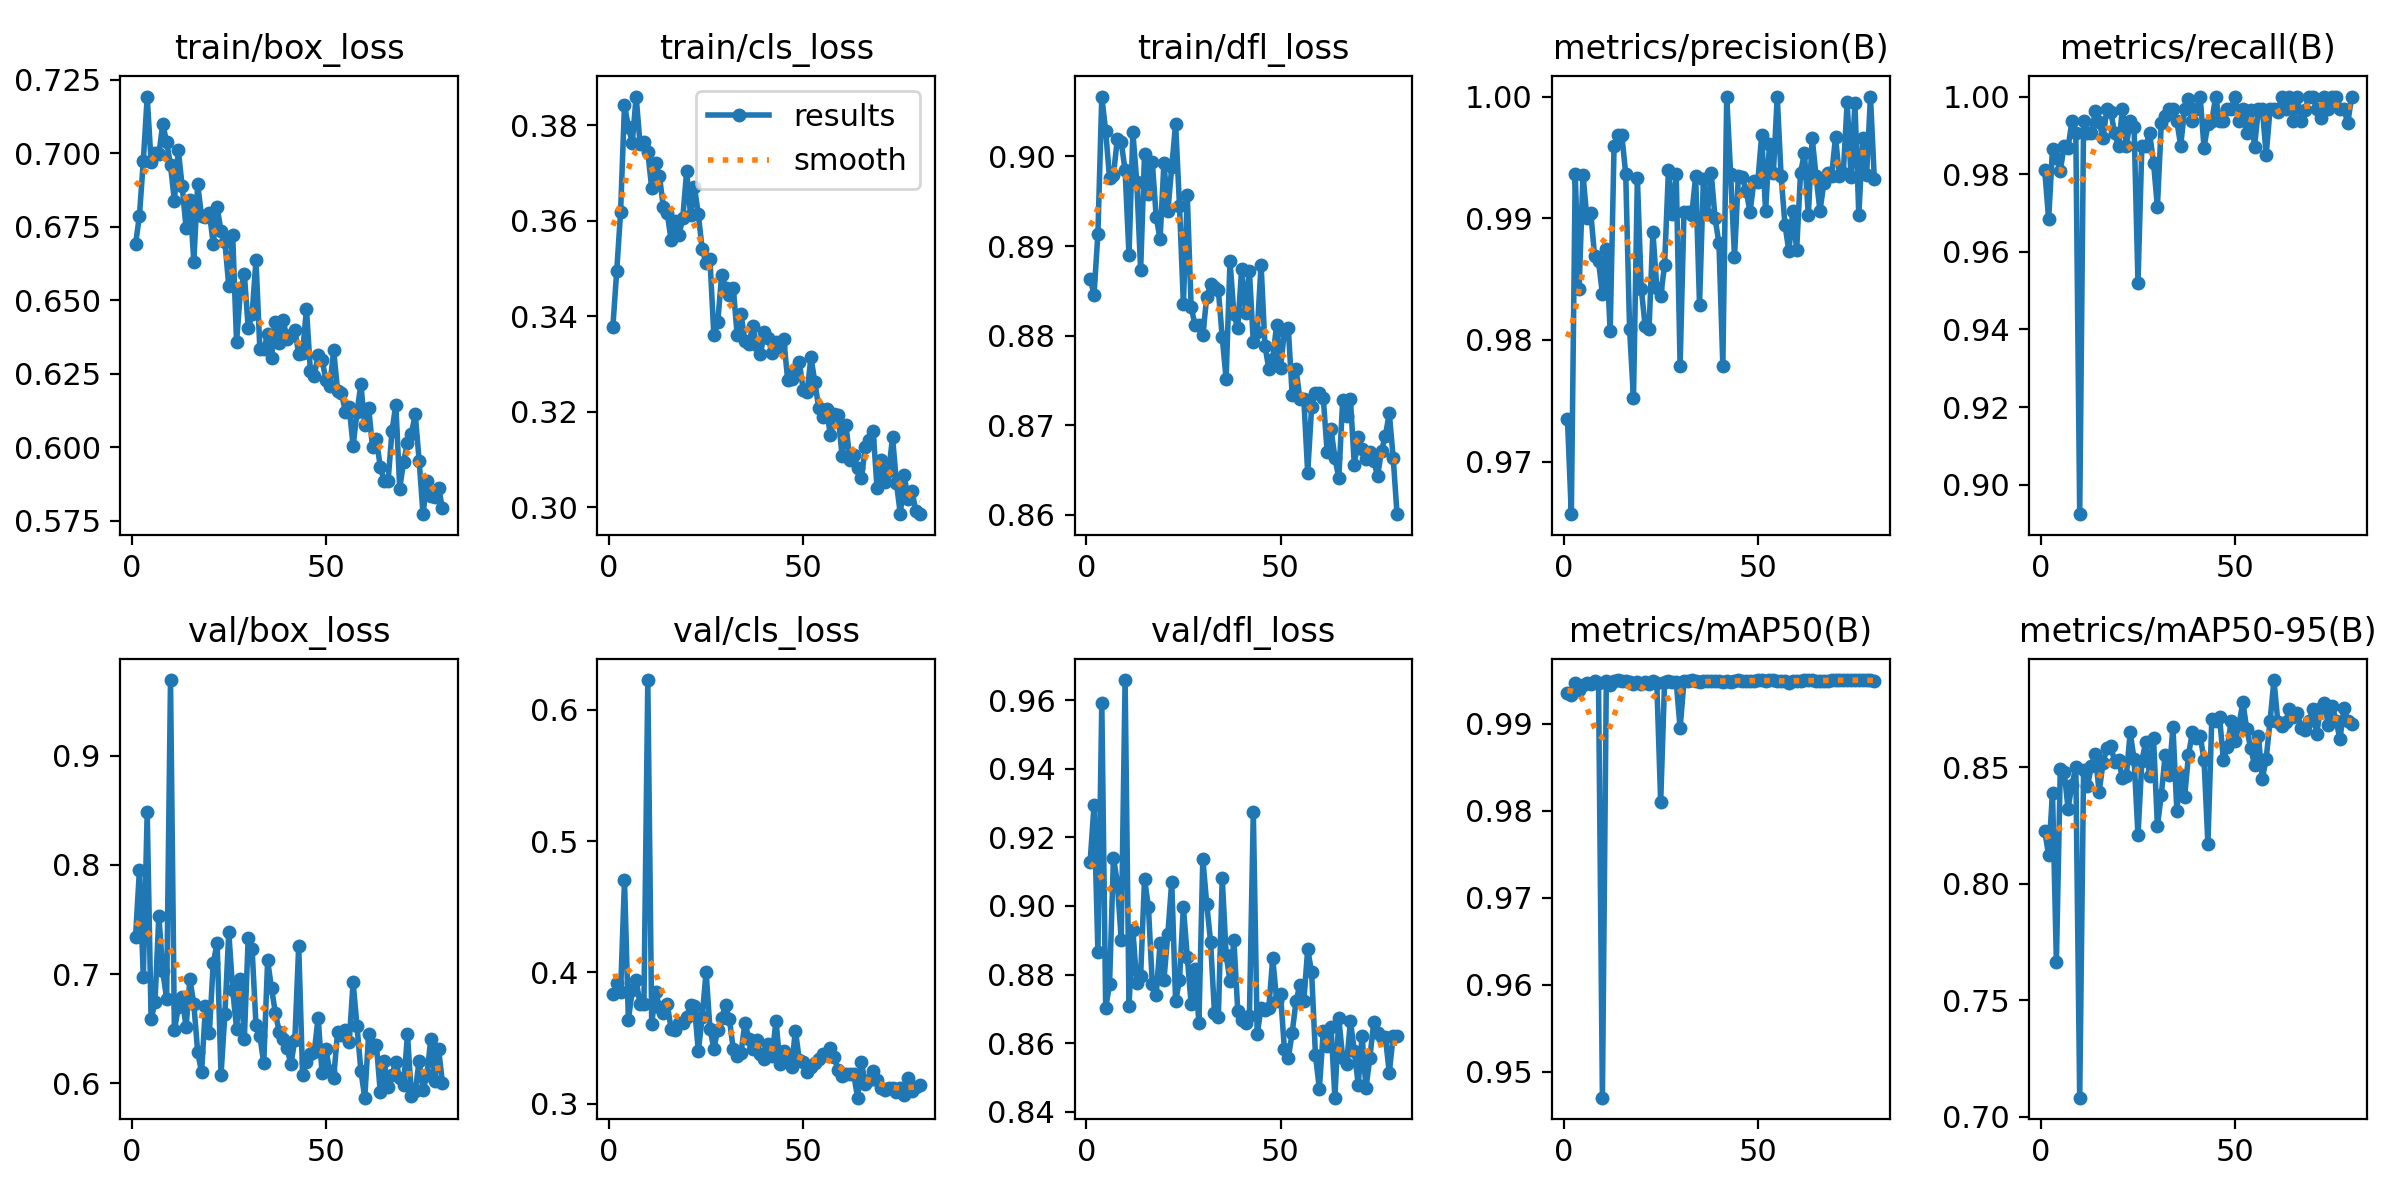

In [ ]:
from IPython.display import Image, clear_output
Image(filename='/content/runs/detect/train/results.png',width=1000)

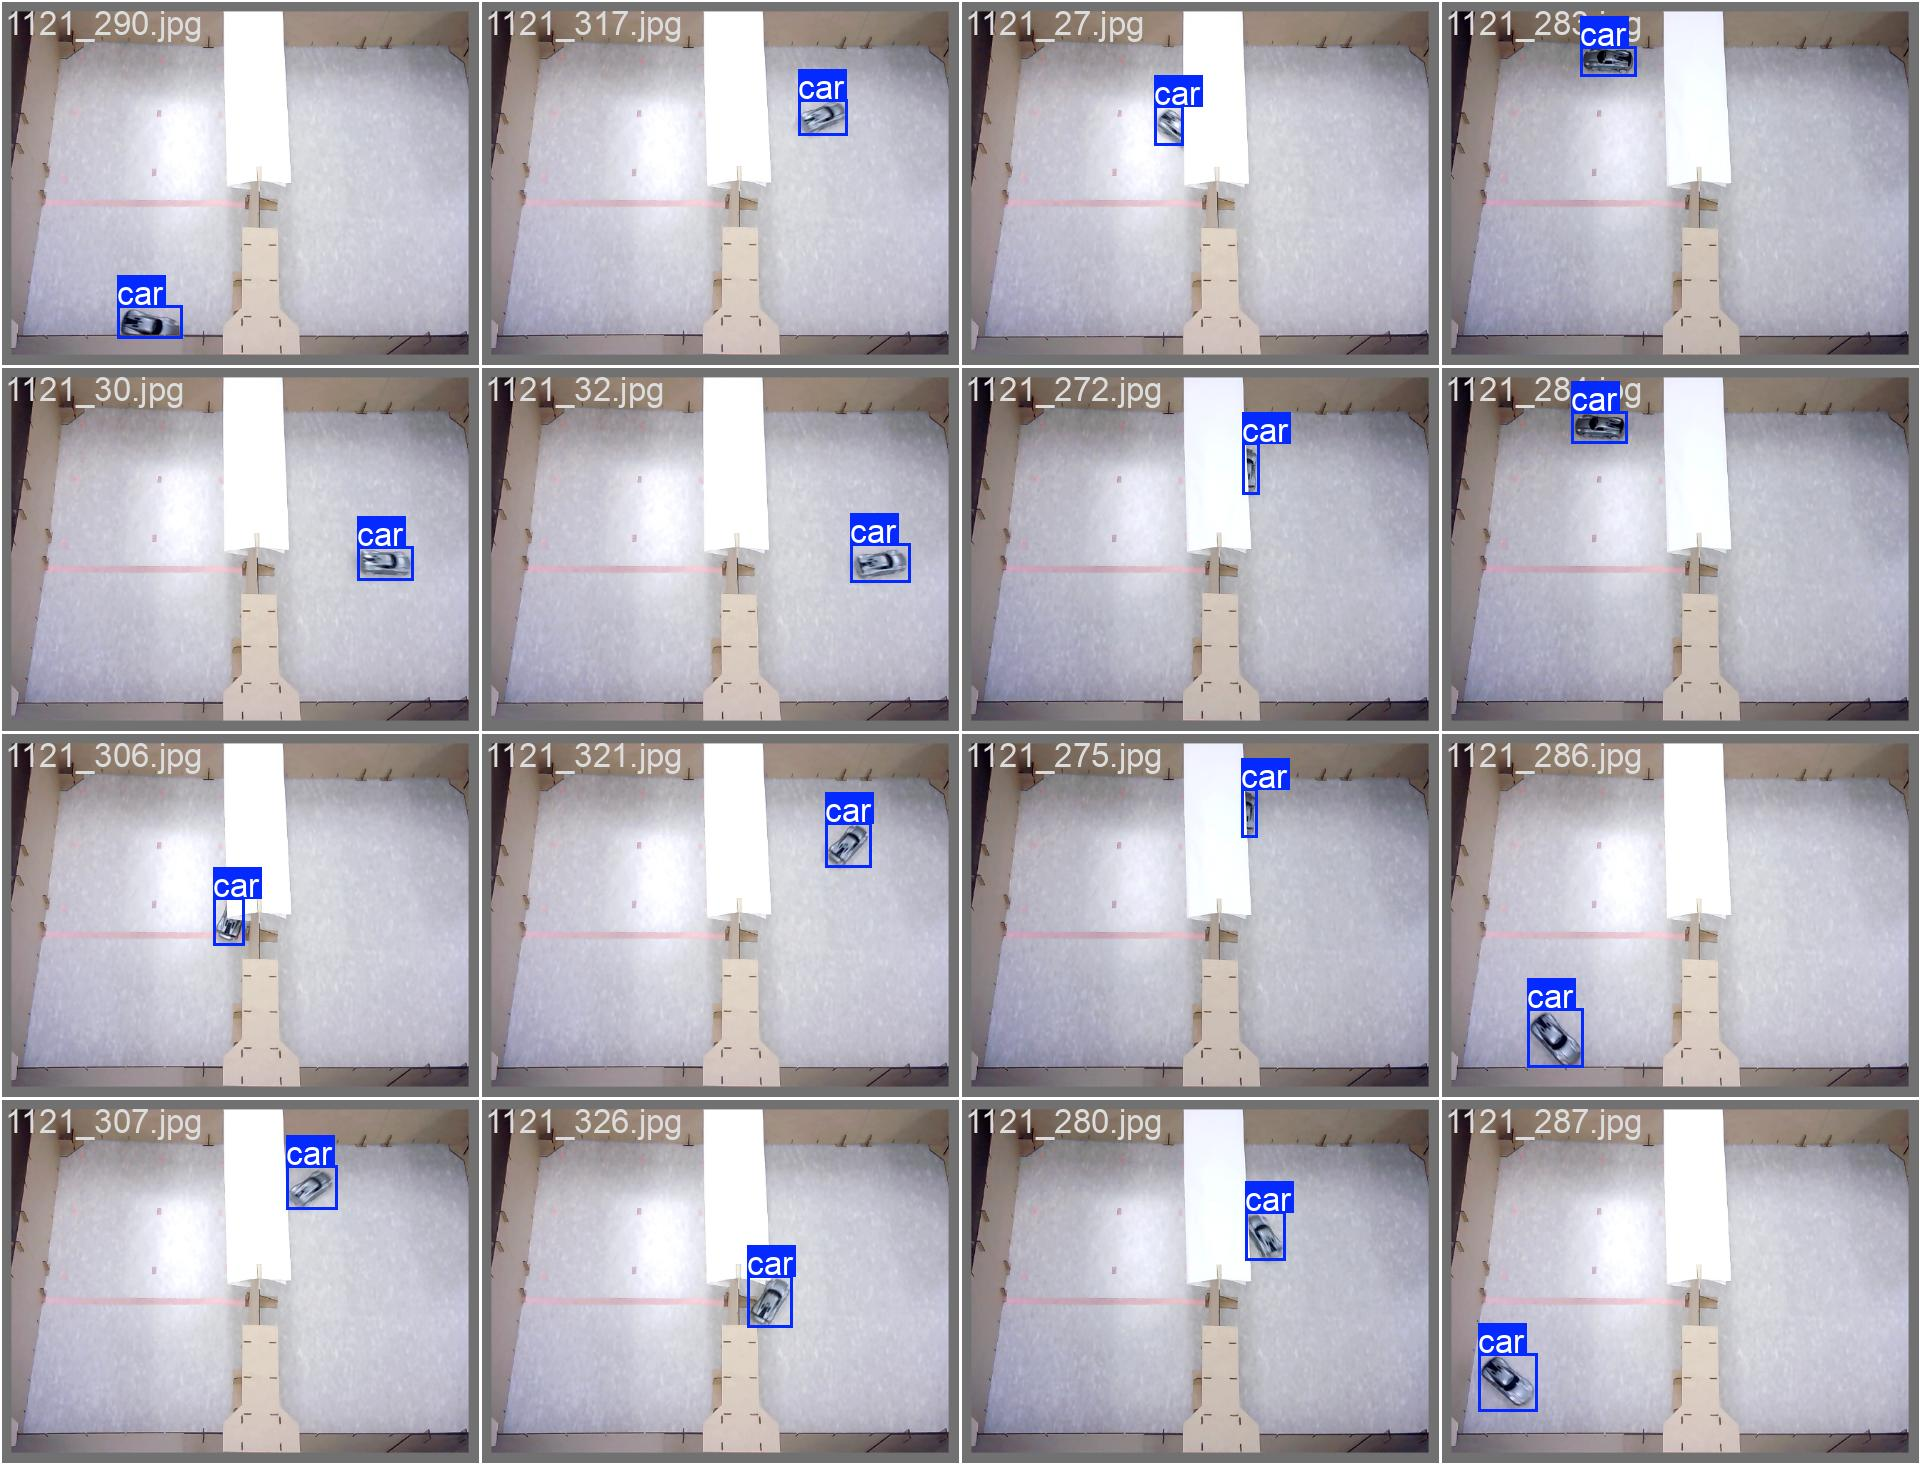

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg', width=1000)

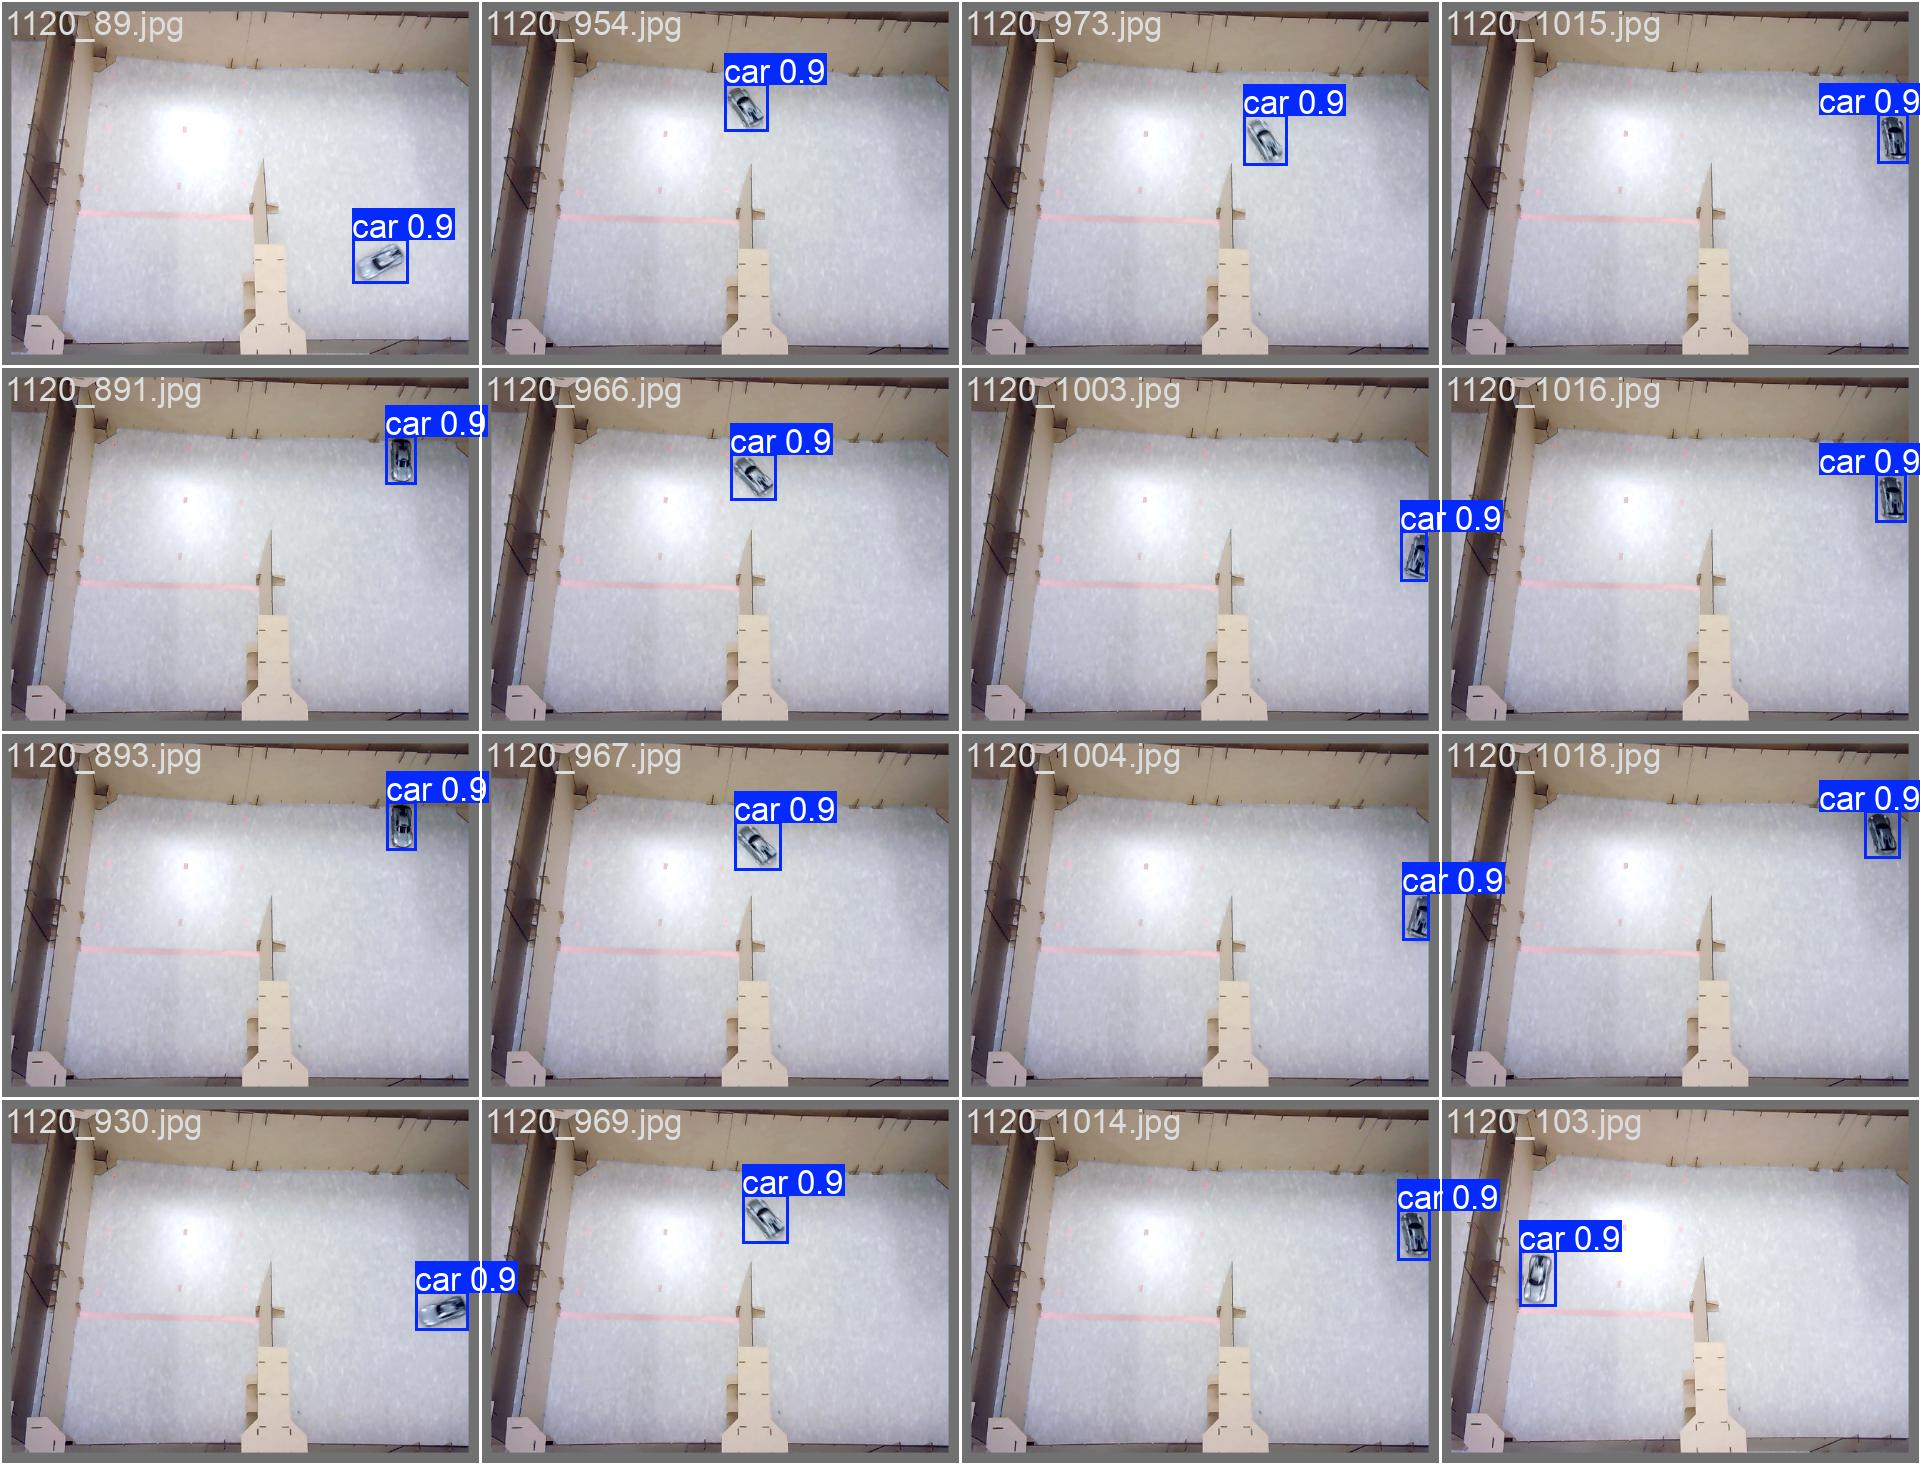

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=1000)

In [ ]:
model_best = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
results = model.predict(source = '/content/dataset/my_data/test/images/',save=True)


image 1/115 /content/dataset/my_data/test/images/1120_100.jpg: 480x640 1 car, 52.0ms
image 2/115 /content/dataset/my_data/test/images/1120_1010.jpg: 480x640 1 car, 7.6ms
image 3/115 /content/dataset/my_data/test/images/1120_1019.jpg: 480x640 1 car, 7.6ms
image 4/115 /content/dataset/my_data/test/images/1120_108.jpg: 480x640 1 car, 7.3ms
image 5/115 /content/dataset/my_data/test/images/1120_11.jpg: 480x640 1 car, 7.4ms
image 6/115 /content/dataset/my_data/test/images/1120_1107.jpg: 480x640 1 car, 7.2ms
image 7/115 /content/dataset/my_data/test/images/1120_1109.jpg: 480x640 1 car, 7.2ms
image 8/115 /content/dataset/my_data/test/images/1120_1114.jpg: 480x640 1 car, 7.3ms
image 9/115 /content/dataset/my_data/test/images/1120_112.jpg: 480x640 1 car, 7.3ms
image 10/115 /content/dataset/my_data/test/images/1120_1120.jpg: 480x640 1 car, 7.3ms
image 11/115 /content/dataset/my_data/test/images/1120_1125.jpg: 480x640 1 car, 7.2ms
image 12/115 /content/dataset/my_data/test/images/1120_113.jpg: 48

In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np
import threading
import time
import queue
import concurrent.futures

# def downloadYouTube(videourl, path):


track_history = dict()

video_path = './218543_tiny.mp4'

model = YOLO('best.pt')
frame = queue.Queue()
cap = cv2.VideoCapture(2)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from ultralytics import YOLO
import numpy as np
import threading
import time
import queue
import concurrent.futures

# def downloadYouTube(videourl, path):


track_history = dict()

video_path = './218543_tiny.mp4'

model = YOLO('best.pt')
frame = queue.Queue()
cap = cv2.VideoCapture(2)

In [ ]:
def origin():
    #cap = cv2.VideoCapture(2)
    global cap

    while cap.isOpened():

        ret, frame = cap.read()

        if not ret:
            break

        #gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        results = model.track(frame, persist=True)



        print(results[0])
        annotated_frame = results[0].plot()

        #boxes = results[0].boxes.xywh.cpu()
        #track_ids = results[0].boxes.id.int().cpu().tolist()
        # for box, track_id in zip(boxes, track_ids):
        #     x, y, w, h = box
        #     if track_id not in track_history:
        #         track_history[track_id] = []

        #     track = track_history[track_id]
        #     track.append((float(x), float(y)))
        #     if len(track)>50:
        #         track.pop(0)

        #     points = np.hstack(track).astype(np.int32).reshape((-1,1,2))
        #     cv2.polylines(annotated_frame, [points], isClosed=False, color=(230,230,230),thickness=3)

        cv2_imshow('Frame',annotated_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()


origin()